## Import Statements

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import math
from sklearn.metrics import f1_score

## Setting up Data

In [67]:
# Reading in raw data into data frame
column_names = ['Pelvic Incidence', 'Pelvic Tilt', 'Lumbar Angle', 'Sacral Slope', 'Pelvic Radius', 'Grade', 'Classification']
data_2C = pd.read_csv('../data/column_2C.dat', sep='\s+', names=column_names)
independent_variables = ['Pelvic Incidence', 'Pelvic Tilt', 'Lumbar Angle', 'Sacral Slope', 'Pelvic Radius', 'Grade']

# Changing the AB and NO classifications to 1 and 0 respectively
data_2C.loc[data_2C.Classification == 'AB', 'Classification'] = 1
data_2C.loc[data_2C.Classification == 'NO', 'Classification'] = 0

## Part B (i)

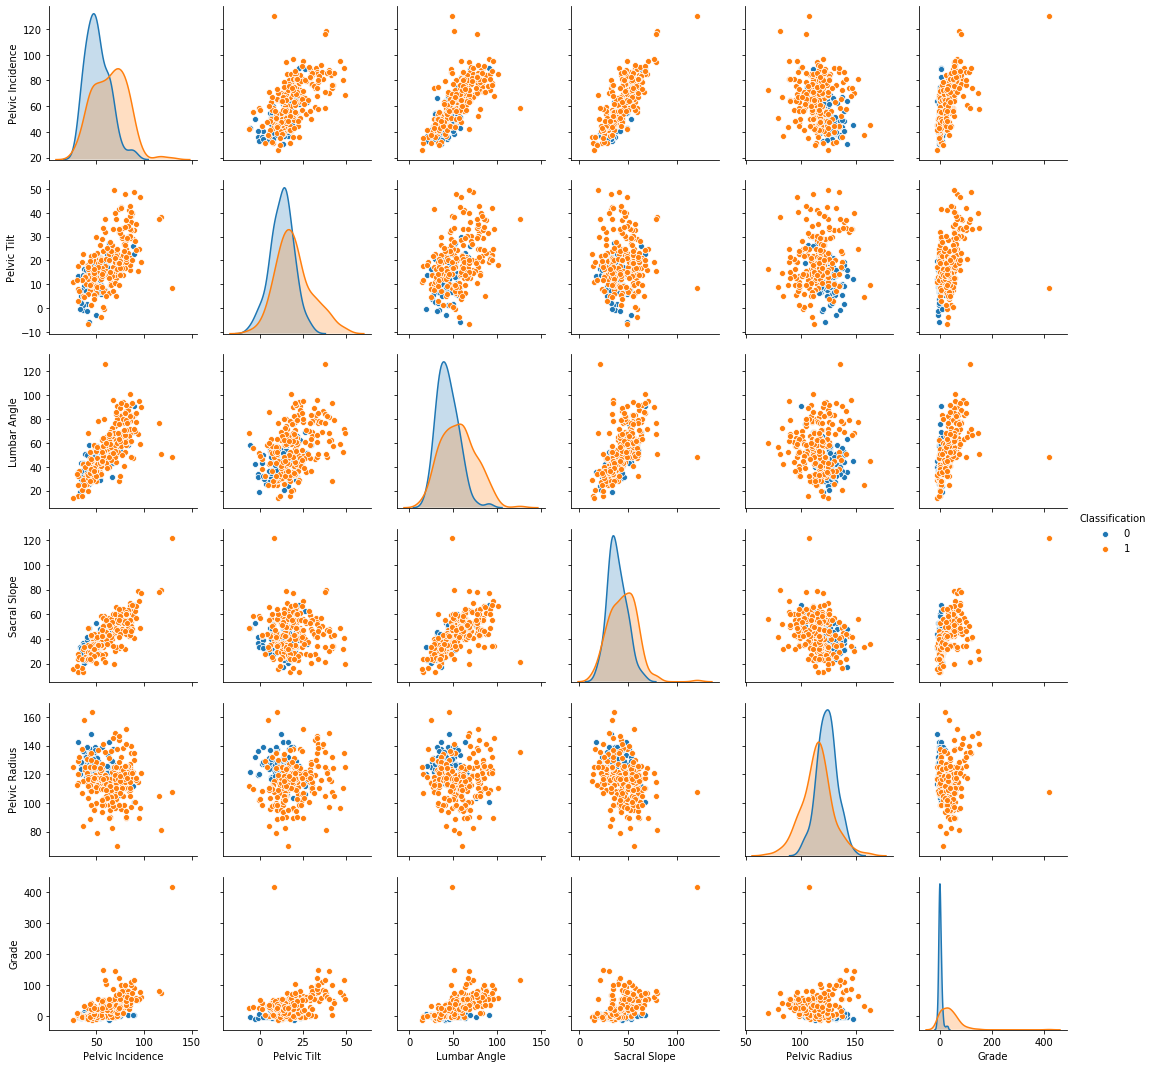

In [68]:
sb.pairplot(data_2C, vars=independent_variables, hue="Classification")

## Part B (ii)

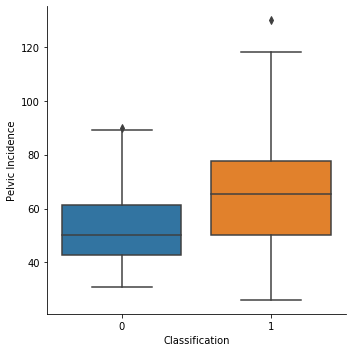

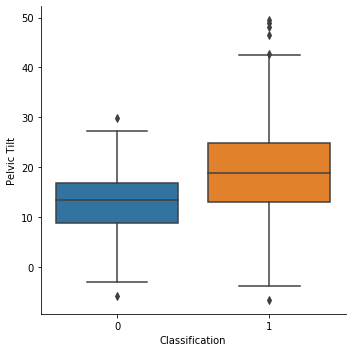

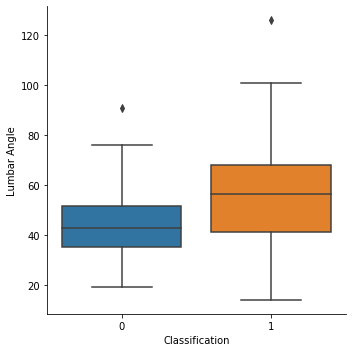

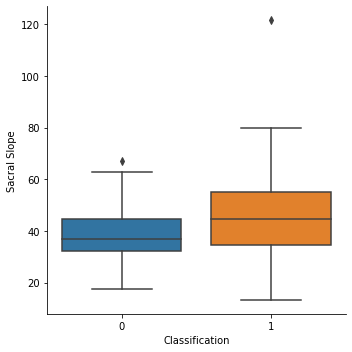

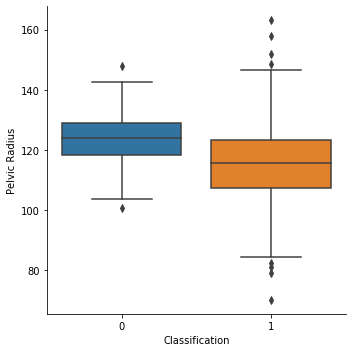

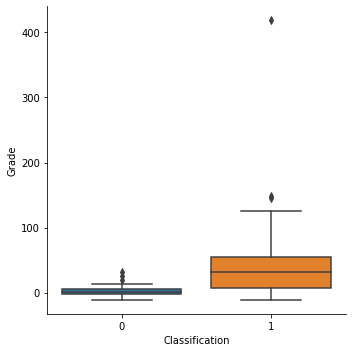

In [69]:
# Iterating through the columns
for col in data_2C.columns :
    # Excluding the classification column
    if col not in "Classification" :
        sb.catplot(data=data_2C, x="Classification", y=col, kind="box")

## Part B (iii)

In [70]:
df1 = data_2C.loc[data_2C.Classification == 0][:70]
df2 = data_2C.loc[data_2C.Classification == 1][:140]
training_df = pd.concat([df1, df2])

df3 = data_2C.loc[data_2C.Classification == 0][70:]
df4 = data_2C.loc[data_2C.Classification == 1][140:]
test_df = pd.concat([df3, df4])

In [71]:
training_df.reset_index(drop=True)
test_df.reset_index(drop=True)

Pelvic Incidence  Pelvic Tilt  Lumbar Angle  Sacral Slope  Pelvic Radius  \
0              50.09        13.43         34.46         36.66         119.13   
1              64.26        14.50         43.90         49.76         115.39   
2              53.68        13.45         41.58         40.24         113.91   
3              49.00        13.11         51.87         35.88         126.40   
4              59.17        14.56         43.20         44.60         121.04   
..               ...          ...           ...           ...            ...   
95             80.11        33.94         85.10         46.17         125.59   
96             95.48        46.55         59.00         48.93          96.68   
97             74.09        18.82         76.03         55.27         128.41   
98             87.68        20.37         93.82         67.31         120.94   
99             48.26        16.42         36.33         31.84          94.88   

     Grade  Classification  
0     3.09               0  
1     5.95               0  
2     2.74               0  
3     0.54               0  
4     2.83               0  
..     ...             ...  
95  100.29               1  
96   77.28               1  
97   73.39               1  
98   76.73               1  
99   28.34               1  

[100 rows x 7 columns]

## Part C (i)

In [72]:
# Setting up data to be in the form for scikit learn
# Put output values in an array
# This code also makes training and test df ready for testing
y_train = training_df.pop('Classification').values
y_test = test_df.pop('Classification').values

In [73]:
# Using my first guess of a suitable K (in this case k = 5)
# Using p=2 uses Euclidean Distance
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(training_df, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Part C (ii)
### Varying K and seeing accurary results

In [86]:
# Creating dictionary that maps k value to score
k_map = {}
# First storing the score from my k value
first_score = knn.score(test_df, y_test)
k_map[5] = first_score
# Now creating the loop that tests all the k values ranging from 1 - 208 by intervals of 3
k_val = 1
for i in range(70) :
    # Building the knn with the new k val
    knn = KNeighborsClassifier(n_neighbors=k_val, p=2)
    # Training it with new k
    knn.fit(training_df, y_train)
    # Storing it's score
    k_map[k_val] = knn.score(test_df, y_test)
    #Updating k
    k_val += 3

In [75]:
## Printing out the various K's and their scores
## To deduce the best K value
for item in k_map.items() :
    print(item)
# Best K-Value or K* = 4

(5, 0.9)
(1, 0.87)
(4, 0.94)
(7, 0.88)
(10, 0.9)
(13, 0.88)
(16, 0.91)
(19, 0.89)
(22, 0.9)
(25, 0.89)
(28, 0.9)
(31, 0.89)
(34, 0.89)
(37, 0.89)
(40, 0.9)
(43, 0.88)
(46, 0.88)
(49, 0.89)
(52, 0.89)
(55, 0.88)
(58, 0.88)
(61, 0.88)
(64, 0.88)
(67, 0.87)
(70, 0.88)
(73, 0.87)
(76, 0.88)
(79, 0.87)
(82, 0.86)
(85, 0.84)
(88, 0.83)
(91, 0.84)
(94, 0.85)
(97, 0.84)
(100, 0.86)
(103, 0.82)
(106, 0.86)
(109, 0.84)
(112, 0.84)
(115, 0.8)
(118, 0.85)
(121, 0.78)
(124, 0.8)
(127, 0.77)
(130, 0.76)
(133, 0.73)
(136, 0.72)
(139, 0.7)
(142, 0.7)
(145, 0.7)
(148, 0.7)
(151, 0.7)
(154, 0.7)
(157, 0.7)
(160, 0.7)
(163, 0.7)
(166, 0.7)
(169, 0.7)
(172, 0.7)
(175, 0.7)
(178, 0.7)
(181, 0.7)
(184, 0.7)
(187, 0.7)
(190, 0.7)
(193, 0.7)
(196, 0.7)
(199, 0.7)
(202, 0.7)
(205, 0.7)
(208, 0.7)


### Computing all the metrics with best K value

In [76]:
# Using best K-Value (k=4) to compute:
# Confusion Matrix, True Positive Rate, True Negative Rate, Precision, F-Score
# Computing the knn again
knn = KNeighborsClassifier(n_neighbors=4, p=2)
knn.fit(training_df, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [77]:
# Confusion Matrix
y_pred = knn.predict(test_df)
my_confusion_matrix = confusion_matrix(y_test, y_pred)
print(my_confusion_matrix)

[[25  5]
 [ 1 69]]


In [78]:
# True Positive Rate (Recall)
true_pr = recall_score(y_test, y_pred)

# True Negative Rate 
true_negatives = 0
false_positives = 0
for i in range(len(y_pred)) :
    # True negatives
    if(y_pred[i] == 0 and y_test[i] == 0) :
        true_negatives += 1
    if(y_pred[i] == 1 and y_test[i] == 0) :
        false_positives +=1

true_negative_rate = true_negatives/(true_negatives + false_positives)

# Precision
precision = precision_score(y_test, y_pred)

# F-Score
f_score = f1_score(y_test, y_pred)

# Printing
print("True Positive Rate: " + str(true_pr))
print("True Negative Rate: " + str(true_negative_rate))
print("Precision: " + str(precision))
print("F-Score: " + str(f_score))

True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
F-Score: 0.9583333333333333


## Part C (iii)

In [79]:
# Limiting the size of the data we are training on
current_n = 10
error_rate_dict = {}
for i in range(22) :
    # Skip 0
    if(i == 0) :
        continue
        
    # Set the current n and reset current k
    current_n = i*10
    current_k_val = 1
    
    # Cut training data to size we want
    current_df1 = data_2C.loc[data_2C.Classification == 0][:int(current_n/3)]
    current_df2 = data_2C.loc[data_2C.Classification == 1][:(int(current_n) - int(current_n/3))]
    current_training_df = pd.concat([current_df1, current_df2])
    current_training_y = current_training_df.pop('Classification').values
    # print(len(current_training_df.index))
    
    # Now we iterate for the best k value
    max_score = 0;
    best_k = 0; 
    for i in range(40) :
        
        # If the K value goes higher than the N
        # We should exit
        if(current_k_val > current_n) :
            break;
        # Train knn with our current k and training set
        knn = KNeighborsClassifier(n_neighbors=current_k_val, p=2)
        knn.fit(current_training_df, current_training_y)
        
        # Test the model and find score
        current_score = knn.score(test_df, y_test)
        if(current_score > max_score) :
            max_score = current_score
            best_k = current_k_val
        
        # Update current k val
        current_k_val += 5
        
    # Store N and it's best error rate
    error_rate_dict[current_n] = 1 - max_score
    
    
    

### Learning Curve

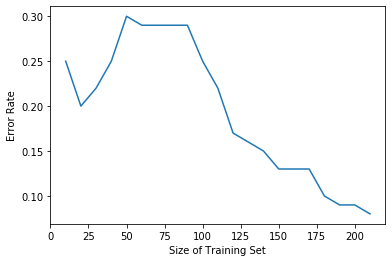

In [80]:
x = list(error_rate_dict.keys())
y = list(error_rate_dict.values())
plt.plot(x,y)
plt.xlabel('Size of Training Set')
plt.ylabel('Error Rate')
plt.show()

## Part D (i, A)

In [81]:
# Train new KNN with all training data
# First Manhattan Distance (Part A)

manhattan_error_df = pd.DataFrame(columns=['K-Val', 'Error-Rate'])

current_k = 1
best_k = 0;
max_score = 0;
for i in range(40) :    
    # Train with Manhattan Distance
    knn = KNeighborsClassifier(n_neighbors=current_k, p=1)
    knn.fit(training_df, y_train)
    
    # Test Score
    current_score = knn.score(test_df, y_test)
    manhattan_error_df = manhattan_error_df.append({'K-Val' : current_k, 'Error-Rate' : 1-current_score}, ignore_index=True)
    if(current_score > max_score) :
        max_score = current_score
        best_k = current_k
        
    # Update k val
    current_k += 5
    
# Best k for Manhattan distance
print("Best K: " + str(best_k))
print(manhattan_error_df)

Best K: 6
    K-Val  Error-Rate
0     1.0        0.12
1     6.0        0.11
2    11.0        0.11
3    16.0        0.12
4    21.0        0.12
5    26.0        0.11
6    31.0        0.12
7    36.0        0.13
8    41.0        0.13
9    46.0        0.13
10   51.0        0.14
11   56.0        0.13
12   61.0        0.15
13   66.0        0.15
14   71.0        0.14
15   76.0        0.14
16   81.0        0.16
17   86.0        0.15
18   91.0        0.20
19   96.0        0.20
20  101.0        0.22
21  106.0        0.21
22  111.0        0.23
23  116.0        0.21
24  121.0        0.22
25  126.0        0.24
26  131.0        0.28
27  136.0        0.28
28  141.0        0.30
29  146.0        0.30
30  151.0        0.30
31  156.0        0.30
32  161.0        0.30
33  166.0        0.30
34  171.0        0.30
35  176.0        0.30
36  181.0        0.30
37  186.0        0.30
38  191.0        0.30
39  196.0        0.30


## Part D (i, B)

In [82]:
# Using K* with the Minkowski Distance
# Resetting variables needed to store best_p
current_score = 0
max_score = 0
best_p = 0
log_error_df = pd.DataFrame(columns=['Log-p', 'Error-Rate'])

for i in range(11) :
    # Skip 0
    if (i == 0) :
        continue
    current_p = 10 ** (i/10)
    # Building knn with current_p and k*
    knn = KNeighborsClassifier(n_neighbors=best_k, p=current_p)
    knn.fit(training_df, y_train)
    
    # Get Score for current p
    current_score = knn.score(test_df, y_test)
    log_error_df = log_error_df.append({'Log-p': math.log(current_p, 10), 'Error-Rate' : 1-current_score}, ignore_index=True)
    if(current_score > max_score) :
        # Store best p value
        max_score = current_score
        best_p = current_p
        
# Best p
print("Best log(p): " + str(math.log(best_p, 10)))
print(log_error_df)

Best log(p): 0.6
   Log-p  Error-Rate
0    0.1        0.09
1    0.2        0.09
2    0.3        0.08
3    0.4        0.08
4    0.5        0.08
5    0.6        0.06
6    0.7        0.07
7    0.8        0.08
8    0.9        0.09
9    1.0        0.09


## Part D (i, C)

In [83]:
# Chebyshev
current_k = 1
best_k = 0;
max_score = 0

chebyshev_error_df = pd.DataFrame(columns=['K-Val', 'Error-Rate'])
for i in range(40) :
    if(i == 0) :
        continue
    
    # Create Euclidean Model
    knn = KNeighborsClassifier(n_neighbors=current_k, metric='chebyshev')
    knn.fit(training_df, y_train)
    
    # Test Score
    current_score = knn.score(test_df, y_test)
    chebyshev_error_df = chebyshev_error_df.append({'K-Val' : current_k, 'Error-Rate' : 1-current_score}, ignore_index=True)
    if(current_score > max_score) :
        max_score = current_score
        best_k = current_k
    
    # Update k
    current_k += 5

print("Best K for Chebyshev: " + str(best_k))
print(chebyshev_error_df)

Best K for Chebyshev: 16
    K-Val  Error-Rate
0     1.0        0.13
1     6.0        0.10
2    11.0        0.12
3    16.0        0.08
4    21.0        0.11
5    26.0        0.12
6    31.0        0.12
7    36.0        0.10
8    41.0        0.13
9    46.0        0.12
10   51.0        0.12
11   56.0        0.12
12   61.0        0.14
13   66.0        0.13
14   71.0        0.14
15   76.0        0.11
16   81.0        0.14
17   86.0        0.12
18   91.0        0.15
19   96.0        0.14
20  101.0        0.19
21  106.0        0.18
22  111.0        0.18
23  116.0        0.18
24  121.0        0.21
25  126.0        0.21
26  131.0        0.25
27  136.0        0.28
28  141.0        0.30
29  146.0        0.30
30  151.0        0.30
31  156.0        0.30
32  161.0        0.30
33  166.0        0.30
34  171.0        0.30
35  176.0        0.30
36  181.0        0.30
37  186.0        0.30
38  191.0        0.30


## Part D (ii)

In [84]:
# Mahalanobis
current_k = 1
best_k = 0;
best_score = 0
max_score = 0

# df
mahalanobis_error_df = pd.DataFrame(columns=['K-Val', 'Error-Rate'])

for i in range(40) :
    if(i == 0) :
        continue
    
    # Create Mahalanobis 
    knn = KNeighborsClassifier(n_neighbors=current_k, metric='mahalanobis', metric_params={'V':np.cov(training_df.T)})
    knn.fit(training_df, y_train)
    
    # Test Score
    current_score = knn.score(test_df, y_test)
    mahalanobis_error_df = mahalanobis_error_df.append({'K-Val' : current_k, 'Error-Rate' : 1-current_score}, ignore_index=True)
    if(current_score > max_score) :
        max_score = current_score
        best_k = current_k
    
    # Update k
    current_k += 5

print("Best K for Mahalanobiss: " + str(best_k))
print(mahalanobis_error_df)

Best K for Mahalanobiss: 1
    K-Val  Error-Rate
0     1.0        0.17
1     6.0        0.17
2    11.0        0.20
3    16.0        0.20
4    21.0        0.21
5    26.0        0.20
6    31.0        0.23
7    36.0        0.21
8    41.0        0.24
9    46.0        0.24
10   51.0        0.24
11   56.0        0.26
12   61.0        0.25
13   66.0        0.27
14   71.0        0.26
15   76.0        0.25
16   81.0        0.24
17   86.0        0.26
18   91.0        0.26
19   96.0        0.26
20  101.0        0.28
21  106.0        0.29
22  111.0        0.29
23  116.0        0.29
24  121.0        0.30
25  126.0        0.30
26  131.0        0.30
27  136.0        0.30
28  141.0        0.30
29  146.0        0.30
30  151.0        0.30
31  156.0        0.30
32  161.0        0.30
33  166.0        0.30
34  171.0        0.30
35  176.0        0.30
36  181.0        0.30
37  186.0        0.30
38  191.0        0.30


## Part E

In [85]:
# Euclidean, Manhattan, Chebyshev
# Euclidean
current_k = 1
best_k = 0;
best_score = 0
max_score = 0
for i in range(40) :
    if(i == 0) :
        continue
    
    # Create Euclidean Model
    knn = KNeighborsClassifier(n_neighbors=current_k, p=2, weights='distance')
    knn.fit(training_df, y_train)
    
    # Test Score
    current_score = knn.score(test_df, y_test)
    if(current_score > max_score) :
        max_score = current_score
        best_k = current_k
    
    # Update k
    current_k += 5

print("Best K for Euclidean: " + str(best_k))

# Manhattan
current_k = 1
best_k = 0;
best_score = 0
max_score = 0
for i in range(40) :
    if(i == 0) :
        continue
    
    # Create Euclidean Model
    knn = KNeighborsClassifier(n_neighbors=current_k, p=1, weights='distance')
    knn.fit(training_df, y_train)
    
    # Test Score
    current_score = knn.score(test_df, y_test)
    if(current_score > max_score) :
        max_score = current_score
        best_k = current_k
    
    # Update k
    current_k += 5

print("Best K for Manhattan: " + str(best_k))


# Chebyshev
current_k = 1
best_k = 0;
best_score = 0
max_score = 0
for i in range(40) :
    if(i == 0) :
        continue
    
    # Create Euclidean Model
    knn = KNeighborsClassifier(n_neighbors=current_k, metric='chebyshev', weights='distance')
    knn.fit(training_df, y_train)
    
    # Test Score
    current_score = knn.score(test_df, y_test)
    if(current_score > max_score) :
        max_score = current_score
        best_k = current_k
    
    # Update k
    current_k += 5

print("Best K for Chebyshev: " + str(best_k))

Best K for Euclidean: 6
Best K for Manhattan: 26
Best K for Chebyshev: 16
